In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# 1. DATASET PREPRATION AND PREPROCESSING

# Data Collection

In [3]:
from sklearn import datasets

In [4]:
iris_flower = datasets.load_iris()

In [5]:
X = pd.DataFrame(iris_flower.data)

y = pd.DataFrame(iris_flower.target)

# Data Visualisation

In [7]:
#sns.pairplot(X, hue = y, kind="reg")

# 2. DATASET SPLITING

In [8]:
from sklearn import model_selection

In [9]:
val_size = 0.2
seed = 7
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size = val_size, random_state = seed)

# 3. MODELING

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Train/test split Dataset

* Leave One Out (LOO) Cross Validation

In [11]:
from sklearn.model_selection import LeaveOneOut

In [12]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    loocv = model_selection.LeaveOneOut()
    cv_results = model_selection.cross_val_score(model, X, y, cv = loocv, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.953333 (0.210924)
KNN: 0.966667 (0.179505)
CART: 0.960000 (0.195959)
NB: 0.953333 (0.210924)
SVM: 0.973333 (0.161107)


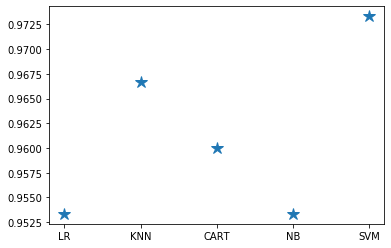

In [13]:
plt.plot(names, results_mean, '*', markersize=12)
plt.show()

In [14]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, SVM: 0.973333


# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [16]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    model.fit(X_pca, y)
    newdata_transformed = pca.transform(X)
    predictions = model.predict(newdata_transformed)
    cv_results = accuracy_score(y, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.913333 
KNN: 0.980000 
CART: 1.000000 
NB: 0.900000 
SVM: 0.953333 


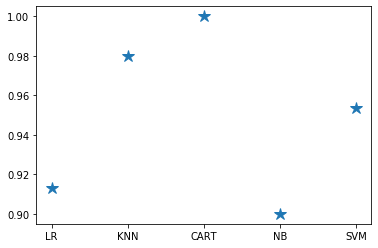

In [17]:
plt.plot(names, results, '*', markersize=12)
plt.show()

In [18]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, CART: 1.000000
